

# 1.   SCRAPPING DATA






In [ ]:
#install google play scraper
!pip install google-play-scraper

#import package yang diperlukan
from google_play_scraper import app
import pandas as pd
import numpy as np
import json
from tqdm import tqdm

In [ ]:
#run kode ini jika ingin scrape data dengan jumlah tertentu
from google_play_scraper import Sort, reviews
result, continuation_token = reviews(
    'com.traveloka.android',
    lang = 'id', #defaults to 'id' untuk bahasa indonesia
    country = 'id', #defaults to 'id' untuk negara indonesia
    sort = Sort.NEWEST, #sort berdasarkan yang paling terbaru
    count = 2000, #jumlah data yang hendak diambil, bisa disesuaikan sesuai kebutuhan
    filter_score_with = None #gunakan untuk memfilter skor yang didapat
)

In [ ]:
#buat menjadi kolom berdasarkan nama kolomnya dengan pandas, dan numpy
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

In [ ]:
#menampilkan sebagian dari variabel df (5 data teratas)
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,90f4e8ed-3168-4bc8-8b8e-a61d05701c25,Fanamy Hasyim,https://play-lh.googleusercontent.com/a-/ALV-U...,traveloka salah satu aplikasi andalanku ❤,5,0,5.13.0,2025-02-24 03:12:42,"Halo Kak, terima kasih banyak atas ratingnya. ...",2025-02-24 03:35:06,5.13.0
1,3b6c405f-699f-4a02-b37b-fbf40167431c,zakaria nugraha,https://play-lh.googleusercontent.com/a-/ALV-U...,SAYA TIDAK BISA TPAY DENGAN ALASAN KEBIJAKAN T...,1,0,3.94.1,2025-02-24 02:19:18,"Hai Zakaria, kami mohon maaf atas ketidaknyama...",2025-02-24 03:12:04,3.94.1
2,056a76e6-584c-4713-b770-4a7adffa5754,Neni Sefriyanti,https://play-lh.googleusercontent.com/a-/ALV-U...,kami masih baru coba naik karena melihat fasil...,5,0,5.13.0,2025-02-23 22:29:18,"Halo Kak, terima kasih banyak atas ratingnya. ...",2025-02-23 22:35:06,5.13.0
3,bbcb995f-f744-4ea8-bdf3-72592b09e872,okta wiryawan,https://play-lh.googleusercontent.com/a-/ALV-U...,Ok,5,0,5.13.0,2025-02-23 15:52:56,Hello! Thank you very much for the positive re...,2025-02-23 16:05:07,5.13.0
4,2c83f0eb-94d7-485c-8210-294468ab0670,Inee Sarah,https://play-lh.googleusercontent.com/a/ACg8oc...,Check-in online nya gangguan terus,1,0,5.14.0,2025-02-23 14:14:12,"Hai Inee, mohon maaf atas kendala yang Anda al...",2025-02-23 14:42:35,5.14.0


In [ ]:
#untuk mengetahui banyak data yang berhasil di dapat dalam tabel
len(df_busu.index)

2000

In [ ]:
#preview userName, rating, tanggal (at), dan reviews (content)
df_busu[['userName', 'score', 'at', 'content']].head()

,userName,score,at,content
0,Fanamy Hasyim,5,2025-02-24 03:12:42,traveloka salah satu aplikasi andalanku ❤
1,zakaria nugraha,1,2025-02-24 02:19:18,SAYA TIDAK BISA TPAY DENGAN ALASAN KEBIJAKAN T...
2,Neni Sefriyanti,5,2025-02-23 22:29:18,kami masih baru coba naik karena melihat fasil...
3,okta wiryawan,5,2025-02-23 15:52:56,Ok
4,Inee Sarah,1,2025-02-23 14:14:12,Check-in online nya gangguan terus


In [ ]:
#ambil hanya userName, rating, date-time (at), dan reviews (content)
my_df = df_busu[['userName', 'score', 'at', 'content']]

In [ ]:
#mengekspor data dari pd dataframe ke csv dan excel
my_df.to_csv("scrapped_data.csv", header = True, index = False)
my_df.to_excel("scrapped_data.xlsx", header = True, index = False)




# 2.   PRE-PROCESSING



In [ ]:
#import data
import pandas as pd

In [ ]:
#local directory
data = pd.read_csv('scrapped_data (8).csv', encoding = 'latin')
data.head()

,userName,score,at,content
0,Fanamy Hasyim,5,2025-02-24 03:12:42,traveloka salah satu aplikasi andalanku â¤
1,zakaria nugraha,1,2025-02-24 02:19:18,SAYA TIDAK BISA TPAY DENGAN ALASAN KEBIJAKAN T...
2,Neni Sefriyanti,5,2025-02-23 22:29:18,kami masih baru coba naik karena melihat fasil...
3,okta wiryawan,5,2025-02-23 15:52:56,Ok
4,Inee Sarah,1,2025-02-23 14:14:12,Check-in online nya gangguan terus


In [ ]:
#deskripsi data
data.shape
data.sample(5)
data.describe()
data['content'].value_counts()

,count
content,
ok,55
mantap,52
good,44
bagus,42
Mantap,31
...,...
godd,1
sangat terpercaya jangan takut duit gak balik cs nya sangat gercep,1
"Ada kah hotel murah , 1 kamar 1 dewasa 0 anak khusus seluruh indonesia",1


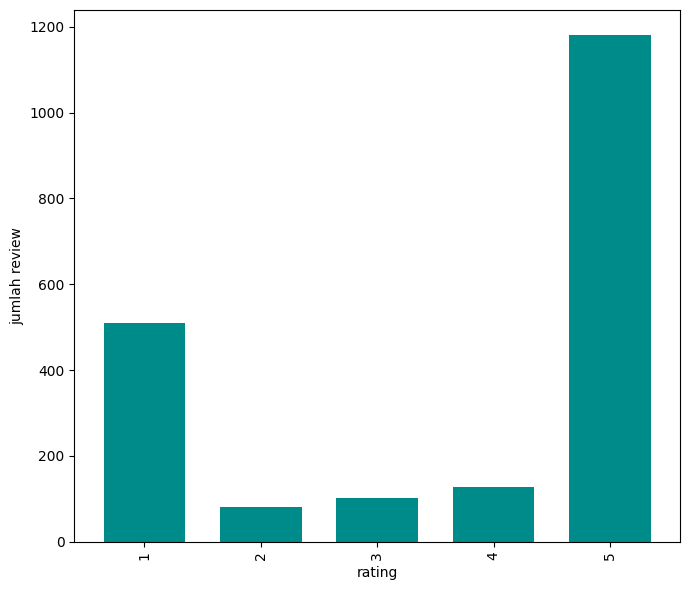

,score,at,content
929,1,2024-12-22 01:06:47,Saya Beri penilaian seburuk buruknya terhadap ...
275,5,2025-02-07 18:22:39,sangat sangat membatu pepergian jauh. trimakas...
1141,5,2024-12-08 09:23:11,Sangat membatu sekali


In [ ]:
#melihat distribusi banyak ulasan berdasarkan rating
import matplotlib.pyplot as plt
_, ax1 = plt.subplots(figsize = (7,6))
stars_histogram = data['score'].value_counts().sort_index()
stars_histogram.plot(kind = 'bar', width = 0.7, color = 'darkcyan')
plt.xlabel('rating')
plt.ylabel('jumlah review')
plt.tight_layout()
plt.show()
data.drop(columns=['userName'], inplace = True)
data.sample(3)

## **CASE FOLDING**

In [ ]:
#mengubah semua huruf dalam dokumen menjadi huruf kecil (lower text)
data['content'].to_string() #mengubah data ke dalam bentuk string atau huruf
data['content'] = data['content'].str.lower()
data.head()

,score,at,content
0,5,2025-02-24 03:12:42,traveloka salah satu aplikasi andalanku â¤
1,1,2025-02-24 02:19:18,saya tidak bisa tpay dengan alasan kebijakan t...
2,5,2025-02-23 22:29:18,kami masih baru coba naik karena melihat fasil...
3,5,2025-02-23 15:52:56,ok
4,1,2025-02-23 14:14:12,check-in online nya gangguan terus


In [ ]:
data.to_csv('hasil case folding.csv')

## **CLEANSING**

In [ ]:
#pembersihan teks dari tab, new line, back slice, mention, link, hashtag, URL
import string
import re #regrex library
def remove_ulasan_special(text):
  #menghapus tab, new line, dan back slice
  text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  #menghapus mention, link, hashtag
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",str(text)).split())
  #menghapus incomplete URL return
  text.replace("http://", " ").replace("https://", " ")
  #data['content'] = data['content'].apply(remove_ulasan_special)
  remove_ulasan_special(data['content'])
  data.to_csv('cleansing.csv')
  data.head()
  #menghapus angka
  def remove_number(text):
    return re.sub(r"\d+", "", str(text))
  data['content'] = data['content'].apply(remove_number)
  data.to_csv('remove number.csv')
  data.head()
  #menghapus tanda baca
  def remove_punctuation(text):
    return text.translate(str.maketrans("","", string.punctuation))
  data['content'] = data['content'].apply(remove_punctuation)
  data.to_csv('remove punctuation.csv')
  data.head()
  #menghapus huruf tunggal
  def remove_singl_schar(text):
    return re.sub(r"\b[a-zA-Z]\b", "", str(text))
  #data['ulasan'] - data['ulasan'].apply(remove_singl_shar)
    remove_singl_char(data['content'])
    data.to_csv('remove single char.csv')
    data.head()

In [ ]:
data.to_csv('hasil cleansing.csv')

## **TOKENIZATION**

In [ ]:
#pemisahan teks menjadi potongan-potongan kata yang disebut sebagai token
from nltk.tokenize import wordpunct_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#nltk word tokenize
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
  return word_tokenize(text)

data['content'] = data['content'].apply(word_tokenize_wrapper)
data.to_csv('tokenization.csv')
data.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,score,at,content
0,5,2025-02-24 03:12:42,"[traveloka, salah, satu, aplikasi, andalanku, ..."
1,1,2025-02-24 02:19:18,"[saya, tidak, bisa, tpay, dengan, alasan, kebi..."
2,5,2025-02-23 22:29:18,"[kami, masih, baru, coba, naik, karena, meliha..."
3,5,2025-02-23 15:52:56,[ok]
4,1,2025-02-23 14:14:12,"[check-in, online, nya, gangguan, terus]"


## **SPELLING CORRECTION**

In [ ]:
#menyeragamkan kata yang memiliki makna yang sama namun penulisannya berbeda
import pandas as pd

normalizad_word = pd.read_excel("normalisasi_traveloka.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
  if row[0] not in normalizad_word_dict:
    normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
  return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['content'] = data['content'].apply(normalized_term)
data.to_csv('spelling corection.csv')
data.head(25)

<ipython-input-9-8c421405b4eb>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
<ipython-input-9-8c421405b4eb>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


,score,at,content
0,5,2025-02-24 03:12:42,"[traveloka, salah, satu, aplikasi, andalanku, ..."
1,1,2025-02-24 02:19:18,"[saya, tidak, bisa, tpay, dengan, alasan, kebi..."
2,5,2025-02-23 22:29:18,"[kami, masih, baru, coba, naik, karena, meliha..."
3,5,2025-02-23 15:52:56,[ok]
4,1,2025-02-23 14:14:12,"[check-in, online, nya, gangguan, terus]"
5,5,2025-02-23 13:39:26,"[sangat, bagus]"
6,1,2025-02-23 13:28:46,"[traveloka, lemot, banget, !, buat, check-in, ..."
7,1,2025-02-23 11:07:47,"[tolong, kak, adain, fitur, kalau, bus, dekat,..."
8,5,2025-02-23 10:21:40,"[sangat, memuaskan, dan, membantu]"
9,5,2025-02-23 09:48:31,[mantap]


## **FILTERING**

In [ ]:
#memfilter untuk mengambil kata-kata penting dengan menggunakan algoritma stoplist (membuang kata yang kurang penting)
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
#dapatkan stopword indonesia dari NLTK stopword
list_stopwords = stopwords.words('indonesian')
#menambahkan stopword tambahan
list_stopwords.extend(['glowal','mehong','sumpek','mama','ma','🙏🙏','gk','bang','ak','blokk','apaan','muantap','ruwet','dasar','tega','tolol','malah','ampas','lu','asu','ga','gila','nyesel','menipu','bnyk','utang','sih','ga','klo','skrg','qia','awwwq','😀','buruk','sangat','jauh','selisihnya','drastis','aneh','spam','iklan','kesalahan','down','payah','dpt','🙏🏼','hatii','jelek','all','gass','love','you','all','💜💜','😊🫰😉👍','abisss','sialan','jatgon','wasting','bolak','balik','gblk','d','badot','rusuh','mulu','batakbatak','jelek','😁🙏🏻','🙄','lo','wahhh','paraah','kecewaa','gile','kyk','payah','sllu','😇','nipu','penipu','robot','asu','tolol','sams3ng','bobrok','👍👍👍','allah','gw','se','belja','t...','yaampunnn','✈️','gwe','gata','modus','gue','koq','dn','g','kelaZzzzzzz','ticek','ho','Alok','jempol','kaga','ngotak','😡','gila','A Zee aawa,a*weS. a Wawa wa AA www','toko','kelontong','mbantu','bye','bkal','dipke','gede','Qaaaa','pe','ak','jooss','gandosss','BB','ycc','berisik','ajing','nglindur','hufff','🤝🤝🤲','brosis','Gasssssssssssss','ra','ceto','D😍s😍screenshot d','👎👎','👍💯','ngenntoot','gaje','im','anggakasman','💞💞💞','huuu','cupu','💩','acc','lha','jis','sy','pionir','bsa','meloncoguamelulu','barerod','ddddd','bgs','saprudin','xgc','xx','abdisz']) #TAMBAHIN KATA YANG KURANG PENTING DISINI, SEARCH DULU LEWAT SCRAPPING DATA EXCEL
#menambahkan stopword dari file csv
import pandas as pd
txt_stopword = pd.read_csv('stopword.txt', names = ['stopwords'], header = None, sep = "\t")
#mengkonversi kata stopword tambahan & stopword pada file csv ke list
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
#mengkonversi list ke dictionary
list_stopwords = set(list_stopwords)
#menghapus stopword pada data
def stopwords_removal(words):
  return [word for word in words if word not in list_stopwords]
data['content'] = data['content'].apply(stopwords_removal)
data.to_csv('filtering.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **STEMMING**

In [ ]:
#stemming
!pip3 install swifter
!pip3 install PySastrawi

In [ ]:
#import sastrawi packages
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [ ]:
#membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#stemmed
def stemmed_wrapper(term):
  return stemmer.stem(term)
term_dict = {}

for document in data['content']:
  for term in document:
    if term not in term_dict:
      term_dict[term] = ' '
len(term_dict)

for term in term_dict:
  term_dict[term] = stemmed_wrapper(term)

In [ ]:
#apply stemmed ke data
def get_stemmed_term(document):
  #meratakan daftar yang bersarang sebelum di proses
  flat_document = [item for sublist in document for item in sublist] if any(isinstance(i, list) for i in document) else document
  return [term_dict.get(term, term) for term in flat_document] #gunakan get untuk handle missing keys

data['content'] = data['content'].swifter.apply(lambda x: [get_stemmed_term(item) for item in x] if isinstance(x, list) and any(isinstance(i, list) for i in x) else get_stemmed_term(x))
#terapkan get_stemmed_term ke setiap sublist jika berisi daftar bersarang
data.head()

#simpan data ke csv
data.to_csv('Hasil Preprocessing.csv')
data.head(25)

Pandas Apply:   0%|          | 0/2000 [00:00<?, ?it/s]

,score,at,content
0,5,2025-02-24 03:12:42,"[traveloka, salah, aplikasi, andal, ]"
1,1,2025-02-24 02:19:18,"[tpay, alas, bijak, traveloka, , kaget, kalo, ..."
2,5,2025-02-23 22:29:18,"[coba, fasilitas, nya, janji]"
3,5,2025-02-23 15:52:56,[ok]
4,1,2025-02-23 14:14:12,"[check-in, online, nya, ganggu]"
5,5,2025-02-23 13:39:26,[bagus]
6,1,2025-02-23 13:28:46,"[traveloka, lot, banget, , check-in, siang, sa..."
7,1,2025-02-23 11:07:47,"[tolong, kak, adain, fitur, bus, titik, tumpan..."
8,5,2025-02-23 10:21:40,"[muas, bantu]"
9,5,2025-02-23 09:48:31,[mantap]


In [ ]:
#load data Hasil Preprocessing ke dalam dataframe
import pandas as pd
import numpy as np
data = pd.read_csv('Hasil Preprocessing.csv', usecols = ['content','score'])
data.columns = ['content','score']
data.head(25)

,content,score
0,5,"['traveloka', 'salah', 'aplikasi', 'andal', '']"
1,1,"['tpay', 'alas', 'bijak', 'traveloka', '', 'ka..."
2,5,"['coba', 'fasilitas', 'nya', 'janji']"
3,5,['ok']
4,1,"['check-in', 'online', 'nya', 'ganggu']"
5,5,['bagus']
6,1,"['traveloka', 'lot', 'banget', '', 'check-in',..."
7,1,"['tolong', 'kak', 'adain', 'fitur', 'bus', 'ti..."
8,5,"['muas', 'bantu']"
9,5,['mantap']


In [ ]:
#menggabungkan daftar token menjadi dokumen string tunggal
import pandas as pd
import ast

#load data Hasil Preprocessing ke dalam dataframe
data = pd.read_csv('Hasil Preprocessing.csv')

#periksa apakah kolom 'content' ada sebelum mengganti nama
if 'Unnamed: 0' in data.columns:
  #ubah 'Unnamed: 0' menjadi 'content' jika ada
  data = data.rename(columns={'Unnamed: 0': "content"})

#sekarang, pilih kolom yang diinginkan (jika perlu)
data = data[['content', 'score']]

#lalu, menggabungkan daftar token menjadi dokumen string tunggal
def join_text_list(texts):
  try:
    texts = ast.literal_eval(texts) #baris ini yang error
  except (SyntaxError, ValueError):
    print(f"Warning: Could not parse text: {texts}")
    return texts
  return ' '.join([text for text in texts])

data['content'] = data['content'].apply(join_text_list)
data.head()
data.to_csv('hasil.csv')

1          1
2          2
3          3
4          4
        ... 
1995    1995
1996    1996
1997    1997
1998    1998
1999    1999
Name: content, Length: 2000, dtype: int64
1       ['tpay', 'alas', 'bijak', 'traveloka', '', 'ka...
2                   ['coba', 'fasilitas', 'nya', 'janji']
3                                                  ['ok']
4                 ['check-in', 'online', 'nya', 'ganggu']
                              ...                        
1995                                ['traveloka', 'baik']
1996                     ['oke', '', 'moga', 'depan nya']
1997                                   ['bagus', 'cepat']
1998                                             ['nice']
1999                                             ['coba']
Name: content, Length: 2000, dtype: object


In [ ]:
import difflib
#body_list = data['body'].tolist()
review_text_list = data['content'].values.tolist()
#body = body_list
reviews = review_text_list

reviews_str = [' '.join(map(str, sublist)) for sublist in reviews]

#s - difflib.SequenceMatcher(None, reviews).ratio()
s = difflib.SequenceMatcher(None, reviews_str).ratio()

# 3. PEMBOBOTAN KATA (PEMBOBOTAN TF-IDF)  



In [ ]:
!pip install scikit-learn --upgrade
#fungsi plot term yang sering muncul
from nltk import FreqDist
import seaborn as sns

In [ ]:
#def freq_words(x,term = 30):
def freq_words(x,terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  fdist = FreqDist(all_words)
  words_data = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
  #pilih 25 term yang sering muncul
  d = words_data.nlargest(columns = "count", n = terms)
  plt.figure(figsize = (25,7))
  #ax = sns.barplot(data-d, x="word", y="count")
  ax = sns.barplot(data=d, x="word", y="count")
  plt.show()
  #plot term yang sering muncul
  freq_words(data['content'],25)

In [ ]:
#pembobotan kata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#cvec = countVectorizer(stop_words='english', min_data=1,max_data=.5, ngram_range=(1,2))
cvec = CountVectorizer(stop_words='english',min_df=1, max_df=.5, ngram_range=(1,2))
cvec

CountVectorizer(max_df=0.5, ngram_range=(1, 2), stop_words='english')

In [ ]:
#menghitung semua n-gram yang ditemukan di semua dokumen
from itertools import islice
from nltk.corpus import stopwords

#pastikan review_text_list tidak kosong dan berisi data teks yang sebenernya
review_text_list = data['content'].values.tolist()

#konversi daftar token kembali menjadi string jika diperlukan
review_text_list = [' '.join(str(token) for token in tokens) if isinstance(tokens, list) else str(tokens) for tokens in review_text_list]

#periksa apakah ada ulasan yang tersisa setelah pemrosesan
if not any(review_text_list):
  raise ValueError("review_text_list is empty after preprocessing. Check your preprocessing steps.")

#global str
cvec.fit(review_text_list)
list(islice(cvec.vocabulary_.items(), 20))
len(cvec.vocabulary_)

14348

In [ ]:
#cvec = CountVectorizer(stop_words = 'english', min_data=0025, max_data=.5, ngram_range=(1,2))
cvec = CountVectorizer(stop_words = 'english', min_df=.0025, max_df=.5, ngram_range=(1,2))
cvec.fit(review_text_list)
len(cvec.vocabulary_)

534

In [ ]:
#cvec_counts = cvec.transform(review_text_list)
cvec_counts = cvec.transform(review_text_list)
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (2000, 534)
nonzero count: 10017
sparsity: 0.94%


In [ ]:
#menghitung frekuensi kemunculan term
import numpy as np
import pandas as pd
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_data = pd.DataFrame({'term': cvec.get_feature_names_out(), 'occurences': occ})
counts_data.sort_values(by='occurences', ascending=False).head(20)
#perhitungan dengan TF-IDF
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10017 stored elements and shape (2000, 534)>

In [ ]:
#melihat 20 term teratas dengan weight rata-rata TFIDF
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_data = pd.DataFrame({'term': cvec.get_feature_names_out(), 'weight' : weights})
weights_data.sort_values(by='weight', ascending=False).head(20)

,term,weight
297,mantap,0.069753
46,bagus,0.057015
339,ok,0.047248
59,bantu,0.042263
157,good,0.040764
494,traveloka,0.040490
31,aplikasi,0.039443
318,mudah,0.035167
471,tiket,0.027486
103,cepat,0.021483




# 4. PELABELAN ULASAN  



In [ ]:
#install package
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
#membuat kamus kata
word_dict = {}
for index, row in data.iterrows():
  sentence = row['content']
  #ubah kalimat menjadi string jika belum
  if not isinstance(sentence, str):
    sentence = str(sentence)
  word_token = word_tokenize(sentence)
  for j in word_token:
    if j not in word_dict:
      word_dict[j] = 1
    else:
      word_dict[j] += 1
len(word_dict)
len({k:v for (k,v) in word_dict.items() if v < 4})

3148

In [ ]:
#import lexicon dan hapus kata-kata negasi dari lexicon
import pandas as pd
lexicon = dict()
negasi = ['bukan', 'tidak', 'ga', 'gk', 'gak', 'nggak', 'tetapi', 'ngak', 'tapi']
lexicon = pd.read_csv('modified_full_lexicon.csv')
lexicon = lexicon.reset_index(drop = True)
len(lexicon)
lexicon.head(10)
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']
len(lexicon_word)

10252

In [ ]:
#memeriksa kata yang tidak terdapat pada kamus lexicon
ns_word = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
  if word not in lexicon_word:
    kata_dasar = stemmer.stem(word)
    if kata_dasar not in lexicon_word:
      ns_word.append(word)
len(ns_word)

2975

In [ ]:
#memeriksa kata yang memiliki banyak kemunculan karena kemungkinan bukan case
len({k:v for (k,v) in word_dict.items() if ((k in ns_word) & (v>3))})
ns_word_list = {k:v for (k,v) in word_dict.items() if ((k in ns_word) & (v>3))}
sort_orders = sorted(ns_word_list.items(), key = lambda x: x[1], reverse = True)
sort_orders = sort_orders[0:20]
for i in sort_orders:
  print(i[0], i[1])
sencol = []
senrow = np.array([])
nsen = 0
sentiment_list = []

, 6794
' 5512
content 4000
: 4000
[ 2000
Name 2000
dtype 2000
object 2000
] 1263
`` 769
... 737
'traveloka 229
'tiket 164
'pakai 61
'nya 58
'kecewa 50
'kembali 50
'iya 35
'mesan 34
'keren 31


In [ ]:
#memeriksa kata yang memiliki banyak kemunculan karena kemungkinan bukan case
len({k:v for (k,v) in word_dict.items() if ((k in ns_word) & (v>3))})
ns_word_list = {k:v for (k,v) in word_dict.items() if ((k in ns_word) & (v>3))}
sort_orders = sorted(ns_word_list.items(), key = lambda x: x[1], reverse = True)
sort_orders = sort_orders[0:20]
for i in sort_orders:
  print(i[0], i[1])

, 6794
' 5512
content 4000
: 4000
[ 2000
Name 2000
dtype 2000
object 2000
] 1263
`` 769
... 737
'traveloka 229
'tiket 164
'pakai 61
'nya 58
'kecewa 50
'kembali 50
'iya 35
'mesan 34
'keren 31


In [ ]:
#berfungsi untuk menulis sentimen kata
def found_word(ind,words,word,sen,sencol,sentiment,add):
  #jika sudah termasuk dalam bag of words matrix, maka tinggal menambah nilainya
  if word in sencol:
    sen[sencol.index(word)] +=1
  else:
    #jika tidak, menambahkan kata baru
    sencol.append(word)
    sen.append(1)
    add +=1
    if (words[ind-1] in negasi):
      sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    return sen,sencol,sentiment,add

In [ ]:
#fix
import nltk
from nltk.tokenize import word_tokenize

sencol = []
senrow = np.array([])
nsen = 0
sentiment_list = []

#berfungsi untuk menulis sentimen kata
def found_word(ind, words, word, sen, sencol, sentiment, add):
    #jika sudah termasuk dalam bag of word matrix, maka tinggal menambah nilainya
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
        #jika tidak, menambahkan kata baru
        sencol.append(word)
        sen.append(1)
        add += 1
    if (words[ind - 1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]

    return sen, sencol, sentiment, add

#memeriksa setiap kata, jika mereka muncul dalam leksikon, dan kemudian menghitung sentimen mereka jika mereka muncul
for index, row in data.iterrows():  #lakukan perulangan dengan menggunakan iterasi()
    nsen = senrow.shape[0]
    #pastikan 'content' adalah sebuah string sebelum tokenisasi
    content = row["content"]
    if not isinstance(content, str):
        content = str(content)  #konversikan ke string jika diperlukan

    words = word_tokenize(content)  #mengakses 'content' dari baris dan memberi token

    sentiment = 0
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol) > 0:
        sen = [0 for ii in range(len(sencol))]
    else:
        sen = []

    for word in words:
        ind = words.index(word)
        #periksa apakah mereka termasuk ke dalam leksikon
        if word in lexicon_word:
            sen, sencol, sentiment, add = found_word(ind, words, word, sen, sencol, sentiment, add)
        else:
            #jika tidak, maka periksa kata dasarnya
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen, sencol, sentiment, add = found_word(ind, words, kata_dasar, sen, sencol, sentiment, add)
            #jika masih negatif, coba cocokkan kombinasi kata dengan kata yang berdekatan
            elif (n_words > 1):
                if ind - 1 > -1:
                    back_1 = words[ind - 1] + ' ' + word
                    if (back_1 in lexicon_word):
                        sen, sencol, sentiment, add = found_word(ind, words, back_1, sen, sencol, sentiment, add)
                    elif (ind - 2 > -1):
                        back_2 = words[ind - 2] + ' ' + back_1
                        if back_2 in lexicon_word:
                            sen, sencol, sentiment, add = found_word(ind, words, back_2, sen, sencol, sentiment, add)

    # The indentation of this block was corrected
    if add > 0:
        if index > 0:
            if senrow.size == 0:  #periksa apakah senrow kosong
                senrow = np.array(sen).reshape(1, len(sen))
            elif index != nsen:
                padding_h = np.zeros([senrow.shape[0], add], dtype=int)
                senrow = np.hstack((senrow, padding_h))
                padding_v = np.zeros([(index - nsen), senrow.shape[1]], dtype=int)
                senrow = np.vstack((senrow, padding_v))
            else:
                padding = np.zeros([senrow.shape[0], add], dtype=int)
                senrow = np.hstack((senrow, padding))
            senrow = np.vstack((senrow, np.array(sen).reshape(1, len(sen))))
        if index == 0:
            senrow = np.array(sen).reshape(1, len(sen))
    elif senrow.size > 0:
        senrow = np.vstack((senrow, np.array(sen).reshape(1, len(sen))))

    sentiment_list.append(sentiment)

In [ ]:
#membangun kerangka data yang berisi sekumpulan kata yang telah dihitung sebelumnya
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
data_sen= pd.DataFrame(sentiment_data,columns = sencol)
data_sen.head(20)

,salah,aplikasi,andal,bijak,coba,fasilitas,ok,ganggu,bagus,lot,...,trima,sedi,tanda,dempet,bala,semua,suara,igau,ingat,sentiment
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-3
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-4
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-4
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
#melihat sentimen data original (sudah fix)
import pandas as pd
import numpy as np

res_data = pd.DataFrame([])
res_data['score'] = data['score'].copy()

#periksa dan pilih kolom 'content' dengan benar
print(data.columns)  #cetak kolom 'data' untuk diperiksa

#memuat data asli untuk mengambil 'at' dan 'content'
original_data = pd.read_csv('scrapped_data (8).csv', encoding='latin')

#mendapatkan kolom 'content' dan 'at' dari original_data
res_data['content'] = original_data['content'].copy()
res_data['at'] = original_data['at'].copy()

#mendapatkan 'sentiment' dari data_sen
res_data['sentiment'] = data_sen['sentiment'].copy()

res_data.head(30)

Index(['content', 'content', 'score'], dtype='object')


,score,content,at,sentiment
0,5,traveloka salah satu aplikasi andalanku â¤,2025-02-24 03:12:42,-3
1,1,SAYA TIDAK BISA TPAY DENGAN ALASAN KEBIJAKAN T...,2025-02-24 02:19:18,3
2,5,kami masih baru coba naik karena melihat fasil...,2025-02-23 22:29:18,4
3,5,Ok,2025-02-23 15:52:56,4
4,1,Check-in online nya gangguan terus,2025-02-23 14:14:12,-4
5,5,Sangat bagus,2025-02-23 13:39:26,2
6,1,Traveloka lemot bgt! Buat check-in dari siang ...,2025-02-23 13:28:46,-4
7,1,tolong kak adain fitur klo bus dekat sama titi...,2025-02-23 11:07:47,3
8,5,sangat memuaskan dan membantu,2025-02-23 10:21:40,8
9,5,mantap,2025-02-23 09:48:31,5


In [ ]:
#mengubah penilaian jadi label
#label data negatif(0) jika nilai <0,0 dan label data positif(1) jika nilai >=0,0
label=[]
for index, row in res_data.iterrows():
  if row["score"]>3:
    label.append(1)
  elif row['score']==3:
    if row['sentiment']>=0:
      label.append(1)
    else:
      label.append(0)
  else:
    label.append(0)
res_data["label"] = label
res_data.head(40)

,score,content,at,sentiment,label
0,5,traveloka salah satu aplikasi andalanku â¤,2025-02-24 03:12:42,-3,1
1,1,SAYA TIDAK BISA TPAY DENGAN ALASAN KEBIJAKAN T...,2025-02-24 02:19:18,3,0
2,5,kami masih baru coba naik karena melihat fasil...,2025-02-23 22:29:18,4,1
3,5,Ok,2025-02-23 15:52:56,4,1
4,1,Check-in online nya gangguan terus,2025-02-23 14:14:12,-4,0
5,5,Sangat bagus,2025-02-23 13:39:26,2,1
6,1,Traveloka lemot bgt! Buat check-in dari siang ...,2025-02-23 13:28:46,-4,0
7,1,tolong kak adain fitur klo bus dekat sama titi...,2025-02-23 11:07:47,3,0
8,5,sangat memuaskan dan membantu,2025-02-23 10:21:40,8,1
9,5,mantap,2025-02-23 09:48:31,5,1




# 5.   DATA TRAINING DAN DATA TESTING







In [ ]:
#menghapus kolom yang tidak perlu
klasifikasi = res_data
klasifikasi = res_data.drop(columns=['score', 'at', 'sentiment'])
klasifikasi.head()

,content,label
0,traveloka salah satu aplikasi andalanku â¤,1
1,SAYA TIDAK BISA TPAY DENGAN ALASAN KEBIJAKAN T...,0
2,kami masih baru coba naik karena melihat fasil...,1
3,Ok,1
4,Check-in online nya gangguan terus,0


In [ ]:
#install Package klasifikasi
import codecs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [ ]:
#data training dan data testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(klasifikasi['content'], klasifikasi['label'], test_size = 0.2)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)
#TFIDF Feature
Tfidf_vect = TfidfVectorizer(max_features = 5000)
#Tfidf_vect.fit(klasifikasi['content])
Tfidf_vect.fit(klasifikasi['content'].values.astype('U'))
X_train_Tfidf = Tfidf_vect.transform(X_train.values.astype('U'))
X_test_Tfidf = Tfidf_vect.transform(X_test.values.astype('U'))
X_train_Tfidf.shape
X_test.shape

(400,)



# 6.   NAIVE BAYES CLASSIFIER




In [ ]:
#Naive Bayes Classifier
from sklearn import naive_bayes
import matplotlib.pyplot as plt
NB = naive_bayes.MultinomialNB()
NB.fit(X_train_Tfidf,y_train)
predictions_NB = NB.predict(X_test_Tfidf)
print("NB Accuracy Score -> ",accuracy_score(predictions_NB,y_test)*100)
#Accuracy, Precision, Recall, F1-Score
from sklearn.metrics import classification_report
print("\nHere is the classification report:")
print(classification_report(y_test, predictions_NB))

NB Accuracy Score ->  87.0

Here is the classification report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       137
           1       0.88      0.93      0.90       263

    accuracy                           0.87       400
   macro avg       0.86      0.84      0.85       400
weighted avg       0.87      0.87      0.87       400



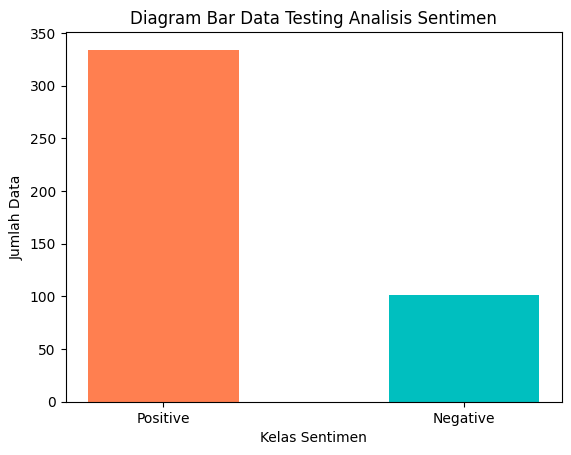

In [ ]:
#Bar plot for reviews
labels = ['Positive', 'Negative']
Category1 = [334, 101]
plt.bar(labels, Category1, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Jumlah Data')
plt.title('Diagram Bar Data Testing Analisis Sentimen')
plt.show()

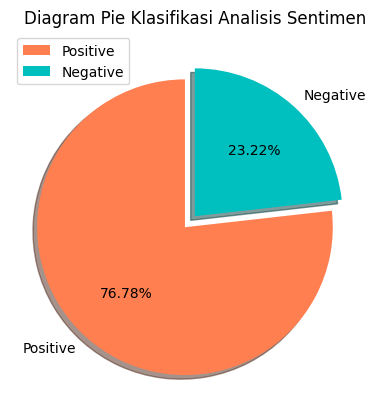

In [ ]:
#pie chart for data testing reviews
color = ['coral', 'c']
plt.pie(Category1, labels=labels, colors=color, startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie Klasifikasi Analisis Sentimen')
plt.legend()
plt.show()

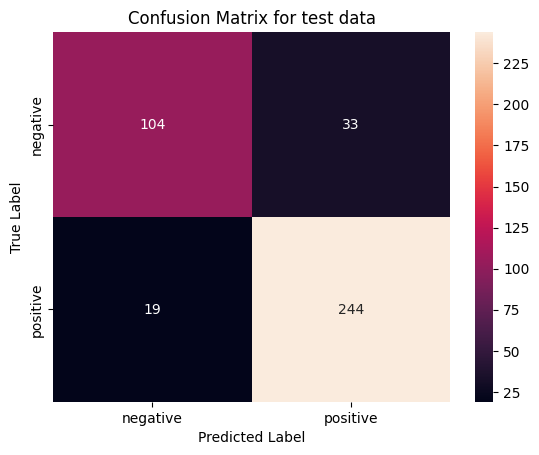

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, predictions_NB)
class_label = ["negative", "positive"]
test = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot=True, fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Akurasi
print("Accuration score hasil prediksi adalah")
print(accuracy_score(y_test, predictions_NB))

#Precision
print("Precision score hasil prediksi adalah")
print(precision_score(y_test, predictions_NB))

#Recall
print("Recall score hasil prediksi adalah")
print(recall_score(y_test, predictions_NB))

#F1-Score
print("F1-Score hasil prediksi adalah")
print(f1_score(y_test, predictions_NB))

Accuration score hasil prediksi adalah
0.87
Precision score hasil prediksi adalah
0.8808664259927798
Recall score hasil prediksi adalah
0.9277566539923955
F1-Score hasil prediksi adalah
0.9037037037037037




# 7.   eXTREME GRADIENT BOOSTING (XGBOOST)



In [ ]:
#eXtreme Gradient Boosting
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
XGB = XGBClassifier()
XGB.fit(X_train_Tfidf,y_train)
predictions_XGB = XGB.predict(X_test_Tfidf)
print("XGB Accuracy Score -> ",accuracy_score(predictions_XGB,y_test)*100)
#Accuracy, Precision, Recall, F1-Score
from sklearn.metrics import classification_report
print("\nHere is the classification report:")
print(classification_report(y_test, predictions_XGB))

XGB Accuracy Score ->  84.0

Here is the classification report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       137
           1       0.88      0.88      0.88       263

    accuracy                           0.84       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.84      0.84      0.84       400



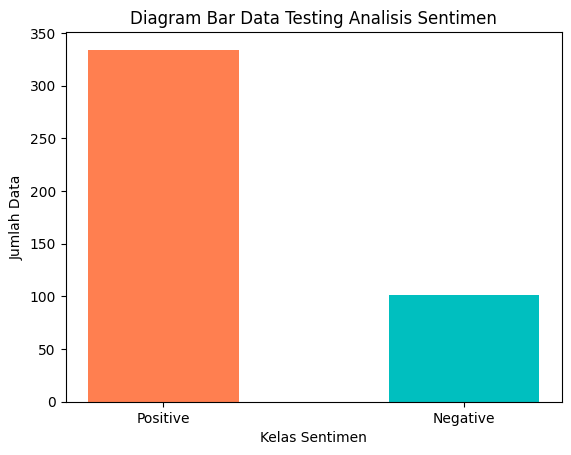

In [ ]:
#Bar plot for reviews
labels = ['Positive', 'Negative']
Category1 = [334, 101]
plt.bar(labels, Category1, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Jumlah Data')
plt.title('Diagram Bar Data Testing Analisis Sentimen')
plt.show()

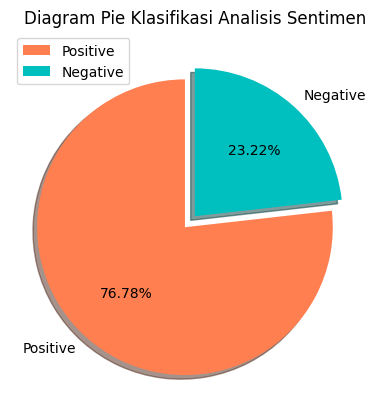

In [ ]:
#pie chart for data testing reviews
color = ['coral', 'c']
plt.pie(Category1, labels=labels, colors=color, startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie Klasifikasi Analisis Sentimen')
plt.legend()
plt.show()

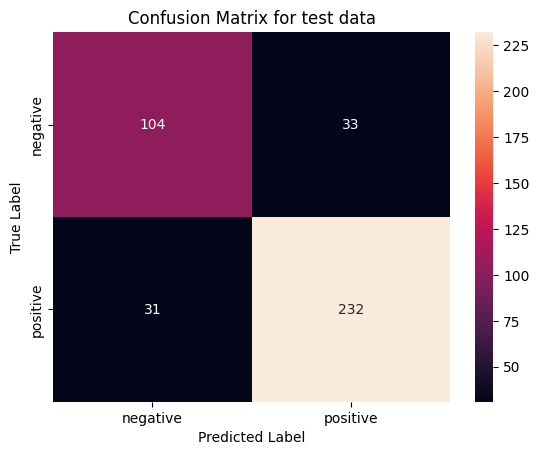

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, predictions_XGB)
class_label = ["negative", "positive"]
test = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot=True, fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Akurasi
print("Accuration score hasil prediksi adalah")
print(accuracy_score(y_test, predictions_XGB))

#Precision
print("Precision score hasil prediksi adalah")
print(precision_score(y_test, predictions_XGB))

#Recall
print("Recall score hasil prediksi adalah")
print(recall_score(y_test, predictions_XGB))

#F1-Score
print("F1-Score hasil prediksi adalah")
print(f1_score(y_test, predictions_XGB))

Accuration score hasil prediksi adalah
0.84
Precision score hasil prediksi adalah
0.8754716981132076
Recall score hasil prediksi adalah
0.8821292775665399
F1-Score hasil prediksi adalah
0.8787878787878788




# 8.   WORDCLOUD POSITIF




In [ ]:
#wordcloud positif
ulasanpositif = klasifikasi.loc[klasifikasi['label']==1] # Fixed: Changed ulasanpoitif to ulasanpositif
ulasanpositif = ulasanpositif.dropna(axis='rows')
ulasanpositif.head()

,content,label
0,traveloka salah satu aplikasi andalanku â¤,1
2,kami masih baru coba naik karena melihat fasil...,1
3,Ok,1
5,Sangat bagus,1
8,sangat memuaskan dan membantu,1


In [ ]:
import difflib
#body_list = df['body'].tolist()
positif_text = ulasanpositif['content'].tolist()
#body = body_list
review_positif = positif_text

In [ ]:
#stopwords
from nltk.corpus import stopwords
stopword = stopwords.words('indonesian')
print(len(stopword))
text_positif = str(positif_text)

758


In [ ]:
#tokenizing
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
token_positif = word_tokenize(text_positif)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#filter out stopword
from nltk.corpus import stopwords
stopworddd = set(stopwords.words('indonesian'))
positif = [w for w in token_positif if not w in stopworddd]
positif = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in positif]

In [ ]:
#import string
table = str.maketrans('','', string.punctuation)
strippedneg = [w.translate(table) for w in positif]

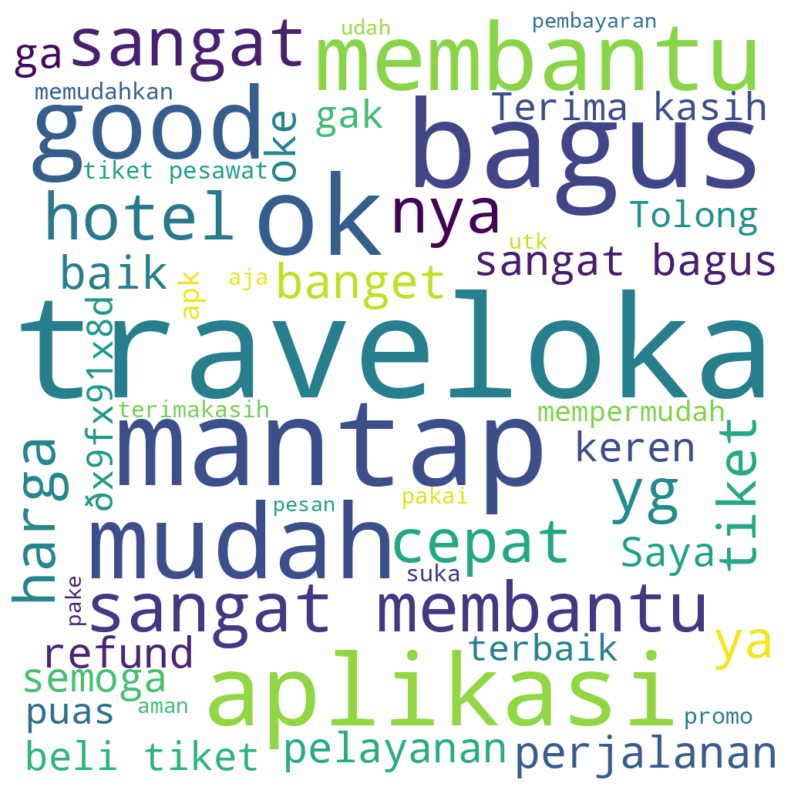

In [ ]:
#wordcloud positif
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
WC_positif = ' '.join(str(word) for word in strippedneg)
wordcloud = WordCloud(max_font_size = 260, max_words = 50, width = 1000, height = 1000, mode = 'RGBA', background_color = 'white').generate(WC_positif)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()



# 9.   WORDCLOUD POSITIF 2



In [ ]:
#wordcloud positif
ulasanpositif = klasifikasi.loc[klasifikasi['label']==1] # Fixed: Changed ulasanpoitif to ulasanpositif
ulasanpositif = ulasanpositif.dropna(axis='rows')
ulasanpositif.head()

,content,label
0,traveloka salah satu aplikasi andalanku â¤,1
2,kami masih baru coba naik karena melihat fasil...,1
3,Ok,1
5,Sangat bagus,1
8,sangat memuaskan dan membantu,1


In [ ]:
len(ulasanpositif)

1373

In [ ]:
import difflib
#body_list = df['body'].tolist()
positif_text=ulasanpositif['content'].tolist()
#body=body_list
review_positif = positif_text

In [ ]:
#stopword
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopword= stopwords.words('indonesian')
print(len(stopword))
text_positif=str(positif_text)

758


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#tokenizing
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
token_positif=word_tokenize(text_positif)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#import string
table = str.maketrans('','', string.punctuation)
strippedneg = [w.translate(table) for w in positif]

In [ ]:
#filter out stopword
from nltk.corpus import stopwords
stopworddd=set(stopwords.words('indonesian'))
positif=[w for w in token_positif if not w in stopworddd]
positif=[nltk.stem.WordNetLemmatizer().lemmatize(word) for word in positif]

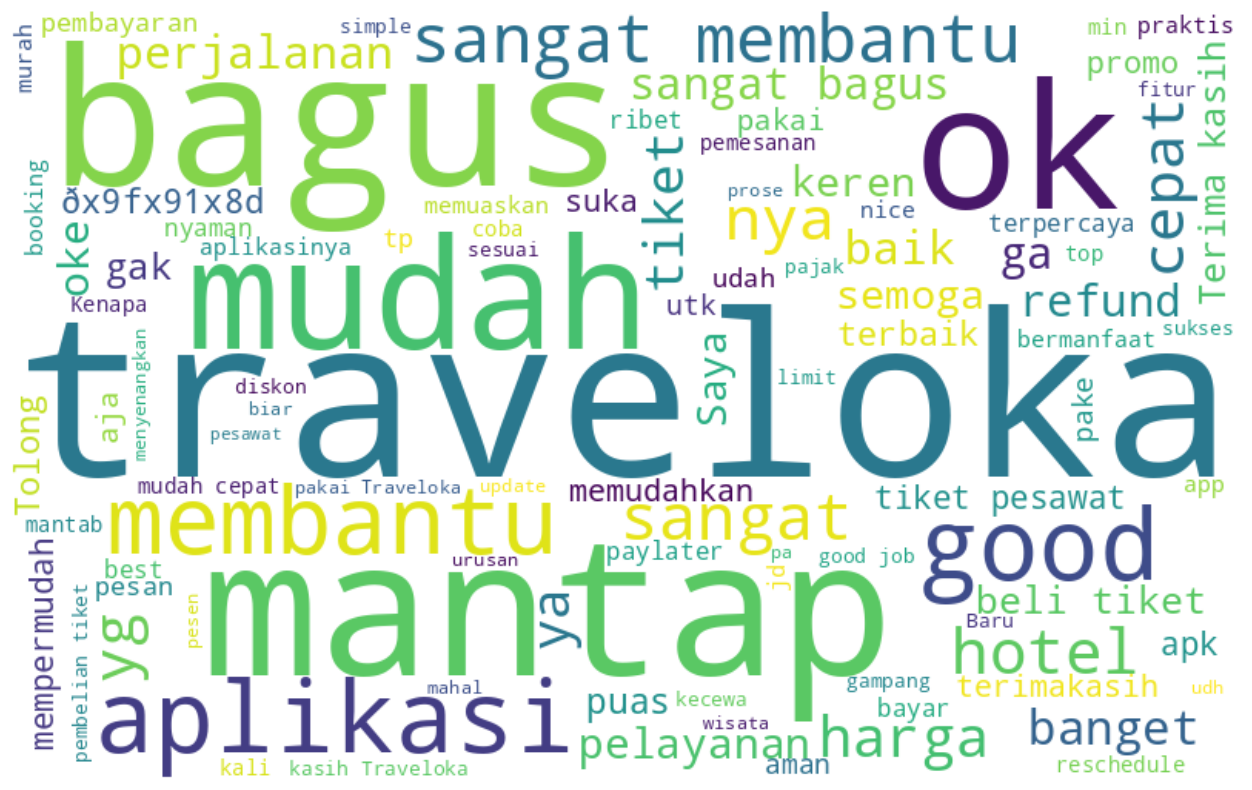

In [ ]:
#wordcloud positif
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
WC_positif=' '.join(str(word) for word in strippedneg)
wordcloud=WordCloud(max_font_size=260, max_words=100, width=800, height=500, mode='RGBA', background_color='white').generate(WC_positif)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

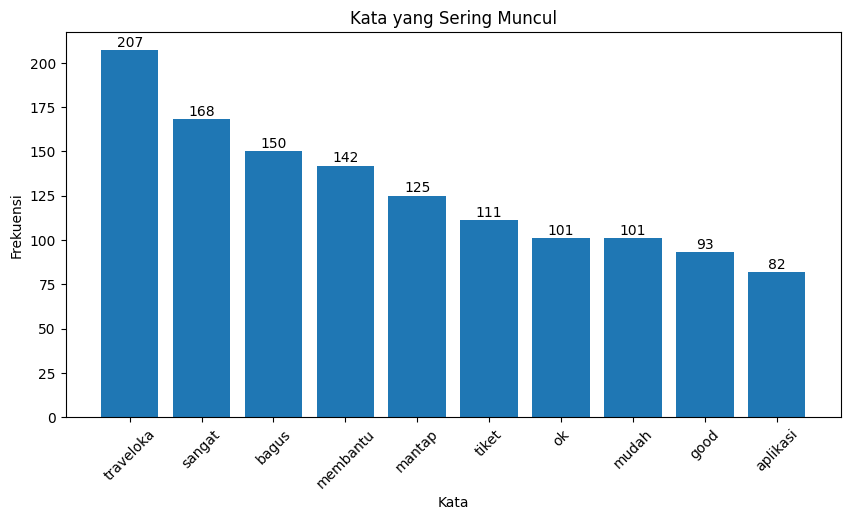

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

word_freq = Counter(WC_positif.lower().split())
top_words = word_freq.most_common(10)
words = [word[0] for word in top_words]
freqs = [word[1] for word in top_words]
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata yang Sering Muncul')
plt.xticks(rotation=45)
for i, value in enumerate(freqs):
    plt.text(i, value + 2, str(value), ha='center')
plt.show()

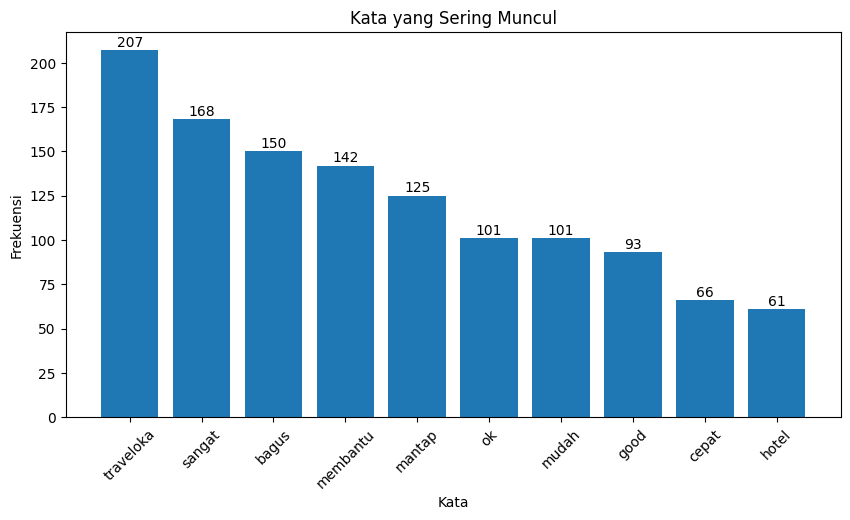

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Daftar stopword khusus untuk nama aplikasi, produk, atau kata netral
custom_stopwords = ['nya', 'tiket', 'aplikasi']

# Pisahkan kata per kata dari teks
words = WC_positif.lower().split()  # pastikan lowercase semua

# Buang kata yang masuk ke dalam stopword
filtered_words = [word for word in words if word not in custom_stopwords]

# Hitung frekuensi kata
word_freq = Counter(filtered_words)
top_words = word_freq.most_common(10)
words = [word[0] for word in top_words]
freqs = [word[1] for word in top_words]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata yang Sering Muncul')
plt.xticks(rotation=45)
for i, value in enumerate(freqs):
    plt.text(i, value + 2, str(value), ha='center')
plt.show()


### **PERBAIKAN WORDCLOUD POSITIF**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


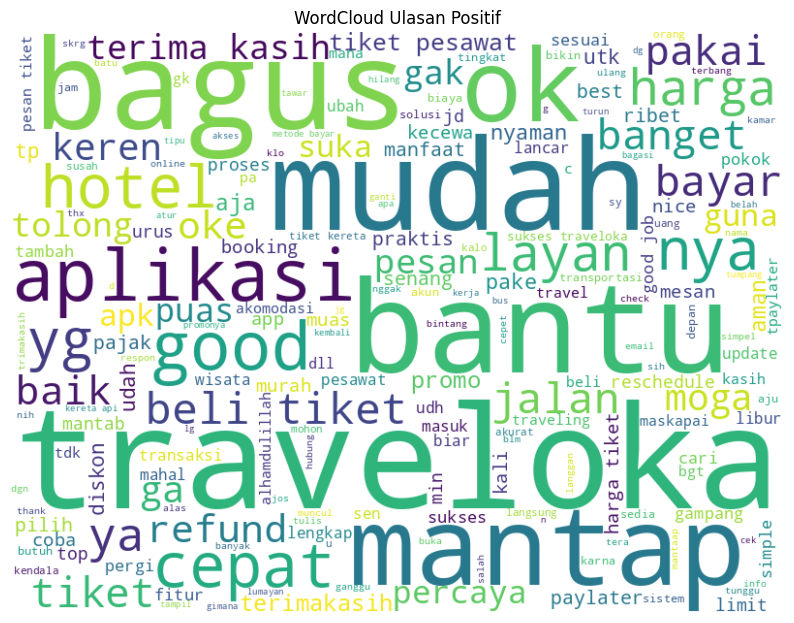

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk

# Download stopwords & punkt jika belum
nltk.download('stopwords')
nltk.download('punkt')

# Inisialisasi stemmer dan stopwords bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

# Fungsi untuk proses pembersihan teks
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return " ".join(stemmed_tokens)

# Proses ulasan positif
positif = klasifikasi[klasifikasi['label'] == 1]['content'].dropna()
positif_processed = positif.apply(preprocess_text)
positif_text = " ".join(positif_processed)


# Tampilkan WordCloud Positif
wordcloud_positif = WordCloud(width=800, height=600, max_font_size=250, background_color='white').generate(positif_text)
plt.figure(figsize=(10, 8))
plt.title("WordCloud Ulasan Positif")
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.show()



# 10.   WORDCLOUD NEGATIF




In [ ]:
#wordcloud negatif
ulasannegatif = klasifikasi.loc[klasifikasi['label']==0]
ulasannegatif = ulasannegatif.dropna(axis='rows')
ulasannegatif.head()

,content,label
1,SAYA TIDAK BISA TPAY DENGAN ALASAN KEBIJAKAN T...,0
4,Check-in online nya gangguan terus,0
6,Traveloka lemot bgt! Buat check-in dari siang ...,0
7,tolong kak adain fitur klo bus dekat sama titi...,0
13,"Ini kenapa aplikasinya, tidak bisa diakses dar...",0


In [ ]:
len(ulasannegatif)

627

In [ ]:
import difflib
#body_list = df['body'].tolist()
negatif_text=ulasannegatif['content'].tolist()
#body=body_list
review_negatif = negatif_text

In [ ]:
#stopword
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopword= stopwords.words('indonesian')
print(len(stopword))
text_negatif=str(negatif_text)

758


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#tokenizing
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
token_negatif=word_tokenize(text_negatif)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#filter out stopword
from nltk.corpus import stopwords
stopworddd=set(stopwords.words('indonesian'))
negatif=[w for w in token_negatif if not w in stopworddd]
negatif=[nltk.stem.WordNetLemmatizer().lemmatize(word) for word in negatif]

In [ ]:
import string
table = str.maketrans('','', string.punctuation)
strippedneg= [w.translate(table) for w in negatif]

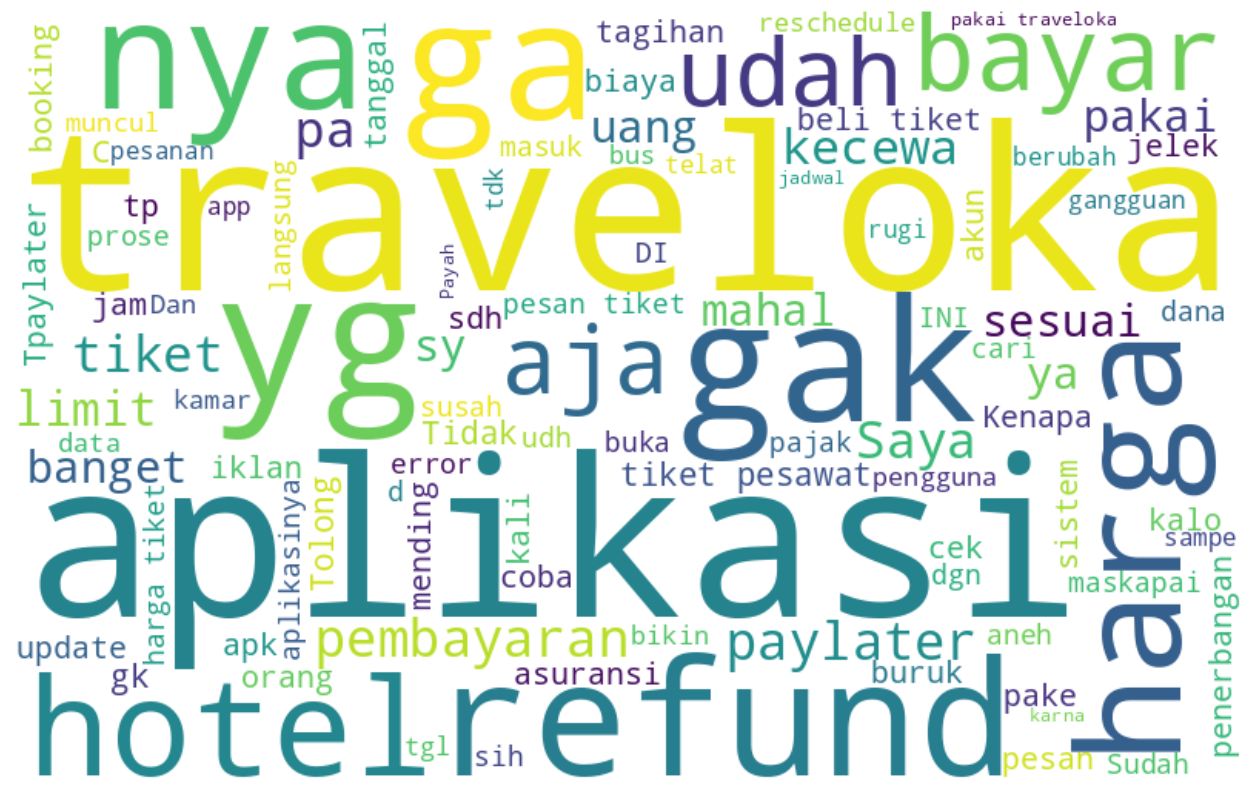

In [ ]:
#wordcloud negatif
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
WC_negatif=' '.join(str(word) for word in strippedneg)
wordcloud=WordCloud(max_font_size=260, max_words=100, width=800, height=500, mode='RGBA', background_color='white').generate(WC_negatif)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

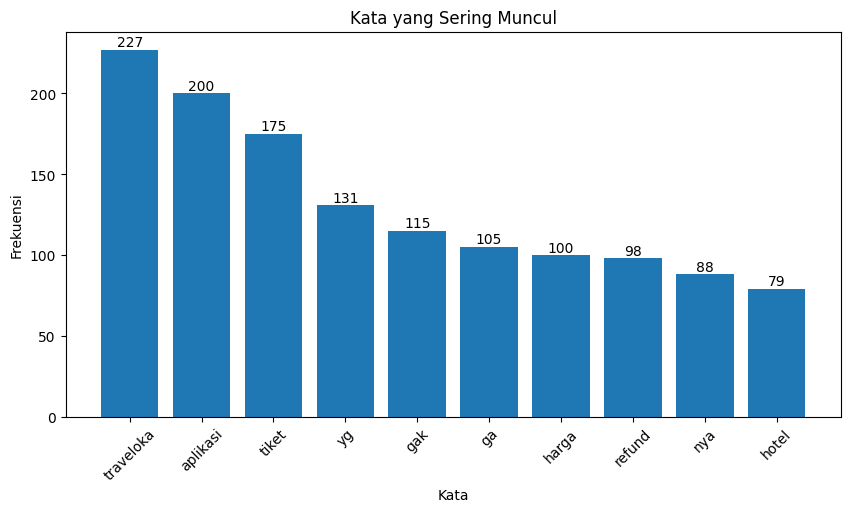

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

word_freq = Counter(WC_negatif.lower().split())
top_words = word_freq.most_common(10)
words = [word[0] for word in top_words]
freqs = [word[1] for word in top_words]
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata yang Sering Muncul')
plt.xticks(rotation=45)
for i, value in enumerate(freqs):
    plt.text(i, value + 2, str(value), ha='center')
plt.show()

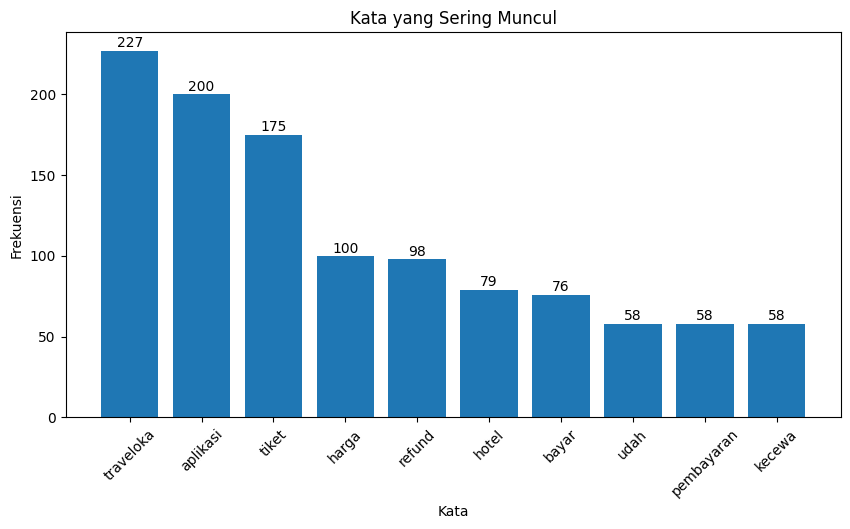

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Daftar stopword khusus untuk nama aplikasi, produk, atau kata netral
custom_stopwords = ['yg', 'gak', 'nya', 'ga','aja']

# Pisahkan kata per kata dari teks
words = WC_negatif.lower().split()  # pastikan lowercase semua

# Buang kata yang masuk ke dalam stopword
filtered_words = [word for word in words if word not in custom_stopwords]

# Hitung frekuensi kata
word_freq = Counter(filtered_words)
top_words = word_freq.most_common(10)
words = [word[0] for word in top_words]
freqs = [word[1] for word in top_words]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata yang Sering Muncul')
plt.xticks(rotation=45)
for i, value in enumerate(freqs):
    plt.text(i, value + 2, str(value), ha='center')
plt.show()


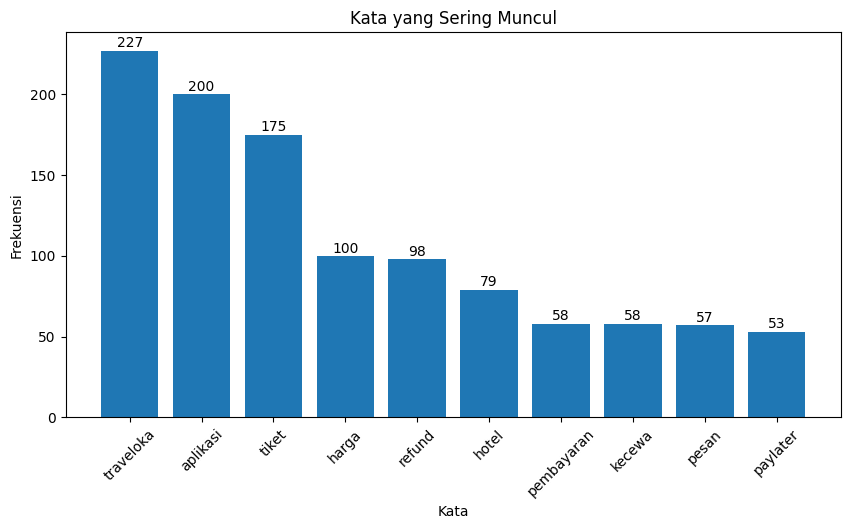

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Daftar stopword khusus untuk nama aplikasi, produk, atau kata netral
custom_stopwords = ['yg', 'gak', 'nya', 'ga','aja','bayar','udah']

# Pisahkan kata per kata dari teks
words = WC_negatif.lower().split()  # pastikan lowercase semua

# Buang kata yang masuk ke dalam stopword
filtered_words = [word for word in words if word not in custom_stopwords]

# Hitung frekuensi kata
word_freq = Counter(filtered_words)
top_words = word_freq.most_common(10)
words = [word[0] for word in top_words]
freqs = [word[1] for word in top_words]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata yang Sering Muncul')
plt.xticks(rotation=45)
for i, value in enumerate(freqs):
    plt.text(i, value + 2, str(value), ha='center')
plt.show()

## **PERBAIKAN WORDCOUD NEGATIF**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


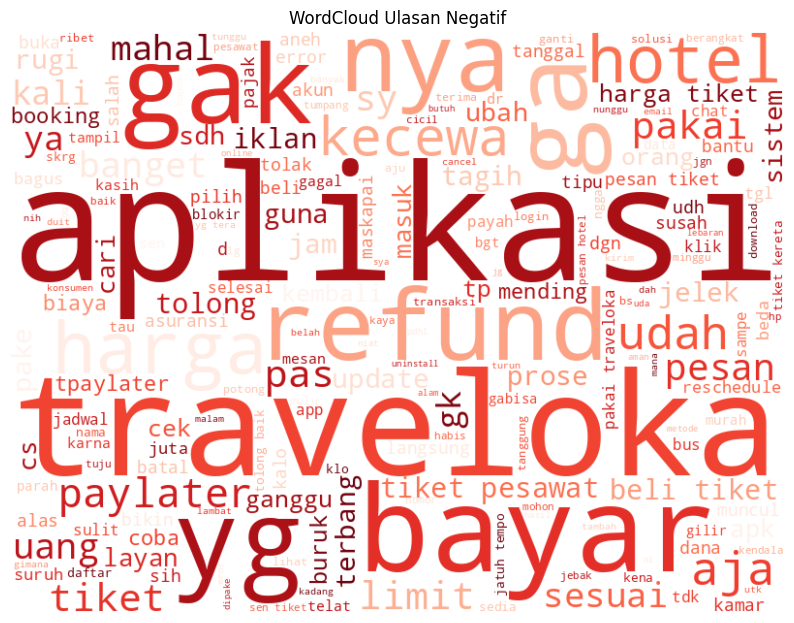

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk

# Download stopwords & punkt jika belum
nltk.download('stopwords')
nltk.download('punkt')

# Inisialisasi stemmer dan stopwords bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

# Fungsi untuk proses pembersihan teks
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return " ".join(stemmed_tokens)

# Proses ulasan negatif
negatif = klasifikasi[klasifikasi['label'] == 0]['content'].dropna()
negatif_processed = negatif.apply(preprocess_text)
negatif_text = " ".join(negatif_processed)

# Tampilkan WordCloud Negatif
wordcloud_negatif = WordCloud(width=800, height=600, max_font_size=250, background_color='white', colormap='Reds').generate(negatif_text)
plt.figure(figsize=(10, 8))
plt.title("WordCloud Ulasan Negatif")
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.show()
